In [65]:
import pandas as pd
import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook')


In [66]:
df = pd.read_csv('../execution-times.csv', delimiter=',')
df.rename(columns={'python-gpu2': 'GPU', 'python-cpu': 'CPU'}, inplace=True)
# df.drop(['tf'], 1)
# df.drop(['num of crops'], 1)
# df.drop(['python-gpu1'], 1)
df = df[df.index[[0, 1, 4, 5]]]
# df.loc[:, 'python'] *= 1000 # in ms
# df.loc[3, 'python'] *= 12
# df.loc[4, 'python'] *= 4
# df.loc[5, 'python'] *= 2

# df.loc[3, 'tf'] /= 12
# df.loc[4, 'tf'] /= 4
# df.loc[5, 'tf'] /= 2

df

,model,stage,GPU,CPU
0,256,pre,46.12,113.11299
1,512,pre,43.96,96.77946
2,768,pre,43.11,110.62485
3,256,inference,21.67,122.87305
4,512,inference,110.35,350.84562
5,768,inference,162.07,860.35038
6,256,post,16.29,21.07799
7,512,post,10.19,6.93560
8,768,post,7.62,16.10964


In [67]:
df1 = df[df['stage'] == 'pre'].drop(['stage'], 1).reset_index()
df2 = df[df['stage'] == 'inference'].drop(['stage'], 1).reset_index()
df3 = df[df['stage'] == 'post'].drop(['stage'], 1).reset_index()
df1

,index,model,GPU,CPU
0,0,256,46.12,113.11299
1,1,512,43.96,96.77946
2,2,768,43.11,110.62485


In [68]:
def prep_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['Model', 'Engine', 'values']
    df['Stage'] = name
    return df

df1 = prep_df(df1, 'Pre-processing')
df2 = prep_df(df2, 'Inference')
df3 = prep_df(df3, 'Post-processing')

df = pd.concat([df1, df2, df3])
df = df.drop(df[df.Engine == 'index'].index)
df = df.drop(df[df.Engine == 'model'].index)

df['Model'] = df['Model'].map({0: 'SSD-256', 1: 'SSD-512', 2: 'SSD-768'})

In [69]:
df

,Model,Engine,values,Stage
2,SSD-256,GPU,46.12000,Pre-processing
3,SSD-256,CPU,113.11299,Pre-processing
6,SSD-512,GPU,43.96000,Pre-processing
7,SSD-512,CPU,96.77946,Pre-processing
10,SSD-768,GPU,43.11000,Pre-processing
11,SSD-768,CPU,110.62485,Pre-processing
2,SSD-256,GPU,21.67000,Inference
3,SSD-256,CPU,122.87305,Inference
6,SSD-512,GPU,110.35000,Inference
7,SSD-512,CPU,350.84562,Inference


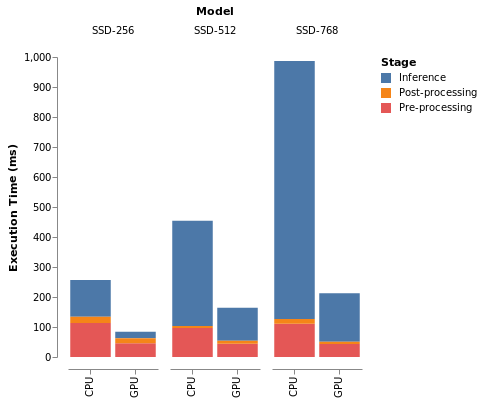

In [74]:
chart = alt.Chart(df).mark_bar(stroke='transparent').encode(

    # tell Altair which field to group columns on
    x=alt.X('Engine:N',
            axis=alt.Axis(
                grid=False,
                title='')),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('values:Q',
            axis=alt.Axis(
                grid=False,
                title='Execution Time (ms)')),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('Model:N'),

    # tell Altair which field to use for color segmentation
    color=alt.Color('Stage:N',
                    scale=alt.Scale(
                        # make it look pretty with an enjoyable color pallet
#                         range=['#96ceb4', '#ffcc5c', '#ff6f69'],
                    ),
                   ))

chart.configure_scale(rangeStep=45).configure_bar(orient='horizontal').configure_view(stroke='transparent')

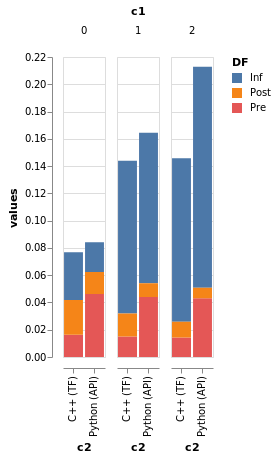

In [35]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

iris = data.iris()

alt.Chart(df).mark_bar().encode(
    x='c2',
    y='values',
    column='c1',
    color='DF'
)